SVM base model evaluation and data setup

In [135]:

'''imports and setting up our plot as well as dataset setup'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import model_selection

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12,6)

dataset = pd.read_csv("breast_cancer.csv")
# preprocessing of data
dataset.replace('?', -99999, inplace=True)
# get all the data into columns
columns = dataset.columns.tolist()
# remove class and id as they have no effect on the prediction
columns = [c for c in columns if c not in ["Class", "ID"]]
# storing the variable we will prredict with
target = 'Class'

X = dataset[columns]
y = dataset[target]
y = y.map({2: 0, 4: 1})
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size=0.7, random_state=0)

creating a normalised dataset

creating a combination feature dataset


In [121]:
to_combine = ['Uniformity of Cell Size', 'Uniformity of Cell Shape','Bare Nuclei']
columns = [c for c in columns if c not in to_combine]
combined_dataset = dataset[columns]
combined_dataset['combined variable'] = dataset.loc[:,to_combine].sum(axis=1)
combined_dataset['combined variable'] = combined_dataset['combined variable'] * 0.001
print(combined_dataset['combined variable'])

combined_X = combined_dataset[columns]
combined_y = dataset[target]
combined_y = combined_y.map({2: 0, 4: 1})
combined_x_train, combined_x_test, combined_y_train, combined_y_test = model_selection.train_test_split(
    combined_X, combined_y, train_size=0.7, random_state=0)

0      0.002
1      0.008
2      0.002
3      0.016
4      0.002
       ...  
694    0.002
695    0.002
696    0.020
697    0.014
698    0.016
Name: combined variable, Length: 699, dtype: float64


/var/folders/n3/_twj430546db0d30m_f72nrw0000gn/T/ipykernel_32195/2371629275.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_dataset['combined variable'] = dataset.loc[:,to_combine].sum(axis=1)
/var/folders/n3/_twj430546db0d30m_f72nrw0000gn/T/ipykernel_32195/2371629275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset['combined variable'] = dataset.loc[:,to_combine].sum(axis=1)
/var/folders/n3/_twj430546db0d30m_f72nrw0000gn/T/ipykernel_32195/2371629275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [119]:
from sklearn.svm import SVC

SVC_model = SVC(gamma='scale', C=5)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = model_selection.cross_validate(
        estimator=SVC_model, X=X, y=y, cv=5, scoring=scoring, return_train_score=True)
print("Mean Training Accuracy: ", results['train_accuracy'].mean()*100,
          "\nMean Training Precision: ", results['train_precision'].mean(),
          "\nMean Training Recall: ", results['train_recall'].mean(),
          "\nMean Training F1 Score: ", results['train_f1'].mean(),
          "\nMean Validation Accuracy: ", results['test_accuracy'].mean()*100,
          "\nMean Validation Precision: ", results['test_precision'].mean(),
          "\nMean Validation Recall: ", results['test_recall'].mean(),
          "\nMean Validation F1 Score: ", results['test_f1'].mean()
          )
    


Mean Training Accuracy:  65.52216969077433 
Mean Training Precision:  0.0 
Mean Training Recall:  0.0 
Mean Training F1 Score:  0.0 
Mean Validation Accuracy:  65.52209660842753 
Mean Validation Precision:  0.0 
Mean Validation Recall:  0.0 
Mean Validation F1 Score:  0.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

In [122]:
results = model_selection.cross_validate(
        estimator=SVC_model, X=combined_X, y=combined_y, cv=5, scoring=scoring, return_train_score=True)
print("Mean Training Accuracy: ", results['train_accuracy'].mean()*100,
          "\nMean Training Precision: ", results['train_precision'].mean(),
          "\nMean Training Recall: ", results['train_recall'].mean(),
          "\nMean Training F1 Score: ", results['train_f1'].mean(),
          "\nMean Validation Accuracy: ", results['test_accuracy'].mean()*100,
          "\nMean Validation Precision: ", results['test_precision'].mean(),
          "\nMean Validation Recall: ", results['test_recall'].mean(),
          "\nMean Validation F1 Score: ", results['test_f1'].mean()
          )
    

Mean Training Accuracy:  97.49667774086379 
Mean Training Precision:  0.9506597088004124 
Mean Training Recall:  0.9782059585492228 
Mean Training F1 Score:  0.9642146807090904 
Mean Validation Accuracy:  94.13977389516958 
Mean Validation Precision:  0.9101401952085183 
Mean Validation Recall:  0.9209183673469388 
Mean Validation F1 Score:  0.9153149193634261


parameter test


functiton to evaluate the models

In [143]:
from sklearn import metrics
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = metrics.accuracy_score(test_labels,predictions)
    precision = metrics.precision_score(test_labels, predictions)
    f1_score = metrics.f1_score(test_labels, predictions)
    return f1_score

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'gamma': np.linspace(0.1,1,12),
    'C': np.linspace(0.1,100,15)
}

SVCgrid_model = model_selection.GridSearchCV(estimator = SVC(), param_grid = param_grid, 
                                 cv = 5, n_jobs = -1, scoring='f1',verbose = 1, return_train_score=True)

SVCgrid_model.fit(x_train,y_train)

print(evaluate(SVCgrid_model, x_test,y_test))

print(SVCgrid_model.best_params_)

scores_of_models = []
base_model = SVC(gamma='auto', random_state = 42)
base_model.fit(x_train, y_train)
scores_of_models.append((base_model.get_params, evaluate(base_model, x_test,y_test)))
scores_of_models.append((SVCgrid_model.best_params_, evaluate(SVCgrid_model, x_test,y_test)))
print(scores_of_models)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
0.9290322580645162
{'C': 7.235714285714286, 'gamma': 0.1}
[(<bound method BaseEstimator.get_params of SVC(gamma='auto', random_state=42)>, 0.9192546583850931), ({'C': 7.235714285714286, 'gamma': 0.1}, 0.9290322580645162)]


In [30]:
param_grid = {
    'gamma': np.linspace(0.001,0.1,15),
    'C': np.linspace(0.1,21,15)
}

SVCgrid_model = model_selection.GridSearchCV(estimator = SVC(random_state=42), param_grid = param_grid, 
                                 cv = 5, n_jobs = -1, scoring='f1',verbose = 1, return_train_score=True)

SVCgrid_model.fit(x_train,y_train)
scores_of_models.append((SVCgrid_model.best_params_, evaluate(SVCgrid_model, x_test,y_test)))
print(scores_of_models)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[(<bound method BaseEstimator.get_params of SVC(gamma='auto', random_state=42)>, 0.9192546583850931), ({'C': 7.235714285714286, 'gamma': 0.1}, 0.9290322580645162), ({'C': 15.028571428571427, 'gamma': 0.001}, 0.9342105263157895)]


In [68]:
scores_of_models = []

In [85]:
param_grid = {
    'kernel': ['rbf'],
    'gamma': np.linspace(0.1,0.01,10),
    'C': np.linspace(10,20,10)
}

SVCgrid_model = model_selection.GridSearchCV(estimator = SVC(random_state=42), param_grid = param_grid, 
                                 cv = 5, n_jobs = -1, scoring='f1',verbose = 2, return_train_score=True)

SVCgrid_model.fit(x_train,y_train)
scores_of_models.append((SVCgrid_model.best_params_, evaluate(SVCgrid_model.best_estimator_, x_test,y_test)))
for i in scores_of_models:
    print(i,'\n')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ......................C=19.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................C=19.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=19.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=19.0, gamma=0.09, kernel=rbf; total time=   0.0s
[CV] END .....................C=19.0, gamma=0.09, kernel=rbf; total time=   0.0s
[CV] END .....................C=19.0, gamma=0.09, kernel=rbf; total time=   0.0s
[CV] END .....................C=19.0, gamma=0.09, kernel=rbf; total time=   0.0s
[CV] END .....................C=19.0, gamma=0.09, kernel=rbf; total time=   0.0s
[CV] END .................C=19.0, gamma=0.09, kernel=sigmoid; total time=   0.0s
[CV] END .................C=19.0, gamma=0.09, kernel=sigmoid; total time=   0.0s
[CV] END .................C=19.0, gamma=0.09, kernel=sigmoid; total time=   0.0s
[CV] END .................C=19.0, gamma=0.09,

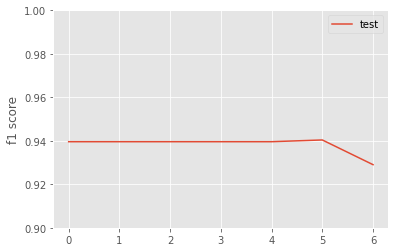

In [86]:
temp_scores = []
for i in scores_of_models:
    temp_scores.append(i[1])
plt.plot(np.arange(len(temp_scores)), temp_scores, '-', label = 'test')
plt.legend()
plt.ylabel('f1 score')
plt.ylim(ymin = 0.9, ymax = 1)
plt.show()

running a grid search on the combined DS and evaluating it

In [147]:
param_grid = {
    'gamma': np.linspace(0.1,1,30),
    'C': np.linspace(20,100,30)
}

SVCgrid_model = model_selection.GridSearchCV(estimator = SVC(), param_grid = param_grid, 
                                 cv = 5, n_jobs = -1, scoring='f1',verbose = 1, return_train_score=True)

SVCgrid_model.fit(combined_x_train,combined_y_train)

print(evaluate(SVCgrid_model, combined_x_test,combined_y_test))

print(SVCgrid_model.best_params_)

scores_of_models = []
base_model = SVC(gamma='auto', random_state = 42)
base_model.fit(combined_x_train, combined_y_train)
scores_of_models.append((base_model.get_params, evaluate(base_model, combined_x_test,combined_y_test)))
scores_of_models.append((SVCgrid_model.best_params_, evaluate(SVCgrid_model, combined_x_test,combined_y_test)))
for i in scores_of_models:
    print(i,'\n')

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
0.8903225806451613
{'C': 20.0, 'gamma': 0.22413793103448276}
(<bound method BaseEstimator.get_params of SVC(gamma='auto', random_state=42)>, 0.8974358974358974) 

({'C': 20.0, 'gamma': 0.22413793103448276}, 0.8903225806451613) 



rmeoving mitosis let's see hwat happens


In [136]:

columns = dataset.columns.tolist()
columns = [c for c in columns if c not in ['Class','ID', 'Mitoses']]
remove_X = dataset[columns]
remove_x_train, remove_x_test, remove_y_train, remove_y_test = model_selection.train_test_split(
    remove_X, y, train_size=0.7, random_state=0)

In [144]:
print(evaluate(SVC(C=5).fit(remove_x_train,remove_y_train),remove_x_test, remove_y_test))

0.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
